# <center>PLAY STORE APP REVIEW ANALYSIS






</center>



##### **Project Type**    - Explorarory Data Analysis
##### **Contribution**    - Individual

# **Project Summary -**

### <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

### <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

### <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>
### <b>Mobile apps are everywhere. They are easy to create and can be money making. Because of these two factors, more and more apps are being developed. In this notebook, we will do a comprehensive analysis of the Android app market by comparing over ten thousand apps in Google Play across different categories. We'll look for insights in the data to devise strategies to drive growth and retention.</b>

### <b>The main objective of this exploratory data analysis project is to understand customer demands better and thus help developers to popularize their product on the Play Store.</b>
### <b>Play Store App Review Analysis project is done by me. In this project I got 2 different csv files as an input. The Csv files are Play_Store.csv and User_Reviews.csv .</b>



# **GitHub Link -**

# **Problem Statement**


Which category has highest share of app in market?

What is distribution of Apps rating?

Which content Rating has highest count?

Which Genres have most number of apps?

What are the sentiments of people towards apps?

Is there any Correlation between App Size and ratings?

How is price trending across some categories?

Is subjectivity and polarity proportional to each other?

What are top 10 downloaded apps based on reviews and what's difference between their rating & reviews?

Is there any corelation between Rating,Size,Installs,Reviews and Price?

Is there any corelation between all quantitative value in both datasets?





#### **Define Your Business Objective?**

my main objective to made this project is to use the knowledge we gained in python module topics such as Data Wrangling, data visualization and numpy,pandas etc. on this given dataset of Google Play App Store and try to make it useful for stakeholders who wants to improve their app quality and ratings among consumers of that given app.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Import Libraries

In [ ]:
# Import Libraries
import numpy as np #to perform mathematical operations on arrays.
import pandas as pd #to analyze big data,read & write I/O files
import matplotlib.pyplot as plt # a collection of command style functions that make matplotlib work like MATLAB
from matplotlib.ticker import MultipleLocator # class is used for setting a tick for every integer multiple of a base within the view interval.
import seaborn as sns #Visulization tools
import missingno as msno #visualizing missing values
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")

### Dataset Loading

In [ ]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
# convert the dataset into pandas dataframe using pd.read_csv
file_path = "/content/drive/MyDrive/Colab Notebooks/"
play_store_data_df = pd.read_csv(file_path + "Play Store Data.csv")
user_review_df = pd.read_csv(file_path + "User Reviews.csv")

### Dataset First View

In [ ]:
# Play store data.csv Dataset First Look
play_store_data_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
# last 5 rows of play store data dataset
play_store_data_df.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [ ]:
#or we can concat to look at both first and last 5 rows
pd.concat([play_store_data_df.head(),play_store_data_df.tail()])


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [ ]:
# user review dataset first and last 5 rows using concat
pd.concat([user_review_df.head(),user_review_df.tail()])

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64294,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


### Dataset Rows & Columns count

In [ ]:
# firstly, we counted row and columns of play store.csv dataset
# computing number of rows
rows_playstore = len(play_store_data_df.axes[0])

# computing number of columns
cols_playstore = len(play_store_data_df.axes[1])

print("Number of Rows in play store dataset: ", rows_playstore)
print("Number of Columns in play store dataset: ", cols_playstore)

Number of Rows in play store dataset:  10841
Number of Columns in play store dataset:  13


In [ ]:
# Secondly, we counted row and columns of user reviews.csv dataset
# computing number of rows
rows_user_review = len(user_review_df.axes[0])

# computing number of columns
cols_user_review = len(user_review_df.axes[1])

print("Number of Rows in user review dataset: ", rows_user_review)
print("Number of Columns in user review dataset: ", cols_user_review)

Number of Rows in user review dataset:  64295
Number of Columns in user review dataset:  5


### Dataset Information

In [ ]:
# Dataset Info of play store.csv dataset
play_store_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
# Dataset Info of user review.csv dataset
user_review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count in play store.csv
duplicate_value = play_store_data_df[play_store_data_df.duplicated()]
print("Duplicate rows in play store dataset:",len(duplicate_value))
#duplicate values in user review.csv
duplicate_value1 = user_review_df[user_review_df.duplicated()]
print("Duplicate rows in user review dataset:",len(duplicate_value1))

Duplicate rows in play store dataset: 483
Duplicate rows in user review dataset: 33616


#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
#firstly, in play store dataset
print (f"Missing Values in each column"+"\n" + "--"*15)

#sum of null values per column
play_store_data_df.isnull().sum()

Missing Values in each column
------------------------------


,0
App,0
Category,0
Rating,1474
Reviews,0
Size,0
Installs,0
Type,1
Price,0
Content Rating,1
Genres,0


In [ ]:
# percentage of missing value in play store dataset
print (f"Missing Values % in each column"+"\n" + "--"*15)
(play_store_data_df.isnull().mean())*100

Missing Values % in each column
------------------------------


,0
App,0.000000
Category,0.000000
Rating,13.596532
Reviews,0.000000
Size,0.000000
Installs,0.000000
Type,0.009224
Price,0.000000
Content Rating,0.009224
Genres,0.000000


from this we get to know that Rating has 1474 null values which contributes 13.60% of the data.
Type has 1 null value which contributes 0.01% of the data.
Content_Rating has 1 null value which contributes 0.01% of the data. Current_Ver has 8 null values which contributes 0.07% of the data. Android_Ver has 3 null values which contributes 0.03% of the data.

In [ ]:
# Missing Values/Null Values Count
#secondly, in user review dataset
print (f"Missing Values in each column"+"\n" + "--"*15)

#sum of null values per column
user_review_df.isnull().sum()

Missing Values in each column
------------------------------


,0
App,0
Translated_Review,26868
Sentiment,26863
Sentiment_Polarity,26863
Sentiment_Subjectivity,26863


In [ ]:
# percentage of missing value in user review dataset
print (f"Missing Values % in each column"+"\n" + "--"*15)
(user_review_df.isnull().mean())*100

Missing Values % in each column
------------------------------


,0
App,0.000000
Translated_Review,41.788631
Sentiment,41.780854
Sentiment_Polarity,41.780854
Sentiment_Subjectivity,41.780854


The number of null values are:
* **Translated_Review** has 26868 null values which contributes **41.79%** of the data.
* **Sentiment** has 26863 null values which contributes **41.78%** of the data.
* **Sentiment_Polarity**  has 26863 null values which contributes **41.78%** of the data.
* **Sentiment_Subjectivity** has 26863 null values which contributes **41.78%** of the data.

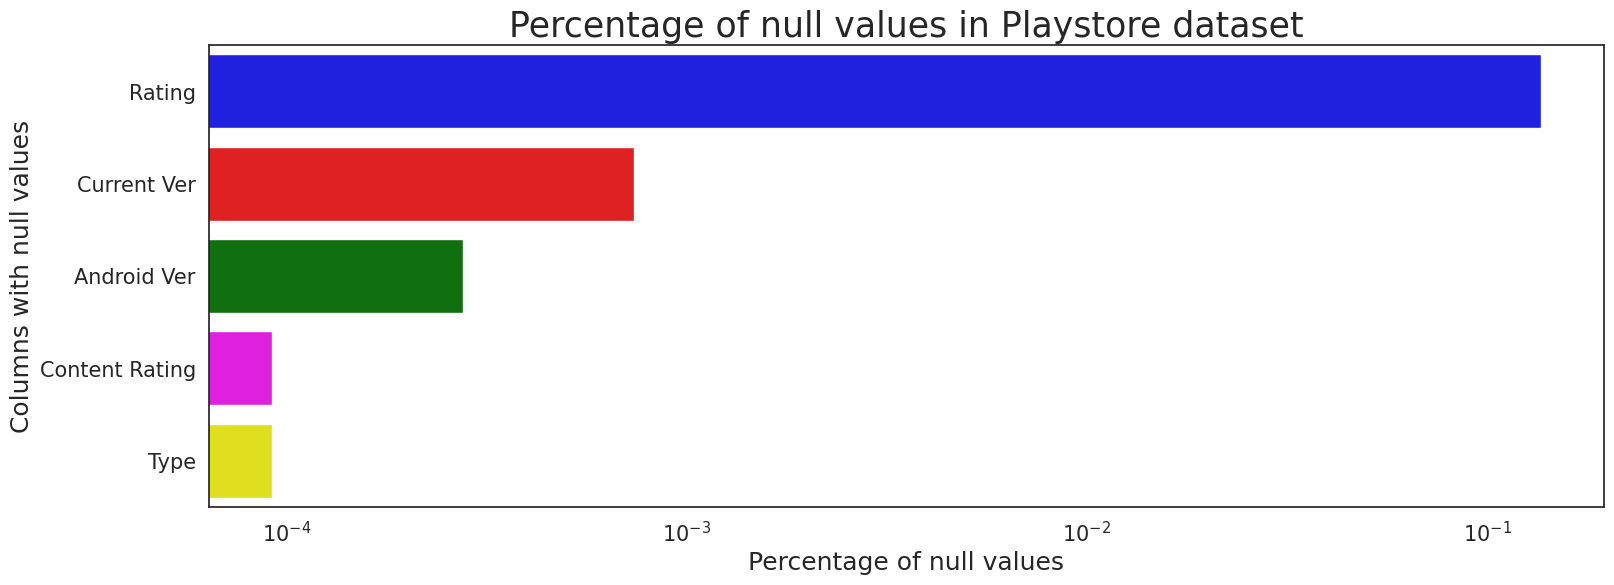

In [ ]:
# Visualizing the missing values in play store dataset

# Define the Google brand colors
google_colors = ["blue", "red", "green", "magenta", "yellow"]

# Set the default figure size for all charts
plt.rcParams["figure.figsize"] = (18, 6)
# Set the style
sns.set_theme(style='white')
# Plot the bar chart with a logarithmic scale
percent_null_counts_playdf = (play_store_data_df.isnull().sum().sort_values(ascending = False))/len(play_store_data_df)
percent_null_counts_playdf = percent_null_counts_playdf[percent_null_counts_playdf != 0]
sns.barplot(x=percent_null_counts_playdf.values, y=percent_null_counts_playdf.index, palette=google_colors)

# Set the x-axis scale to logarithmic so that we can see small values too
plt.xscale('log')

# Set the x-axis and y-axis labels and title
sns.set(font_scale = 1.8)
plt.xlabel("Percentage of null values", fontsize=18)
plt.ylabel("Columns with null values", fontsize=18)
plt.title("Percentage of null values in Playstore dataset", fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)


# Display the plot
plt.show()


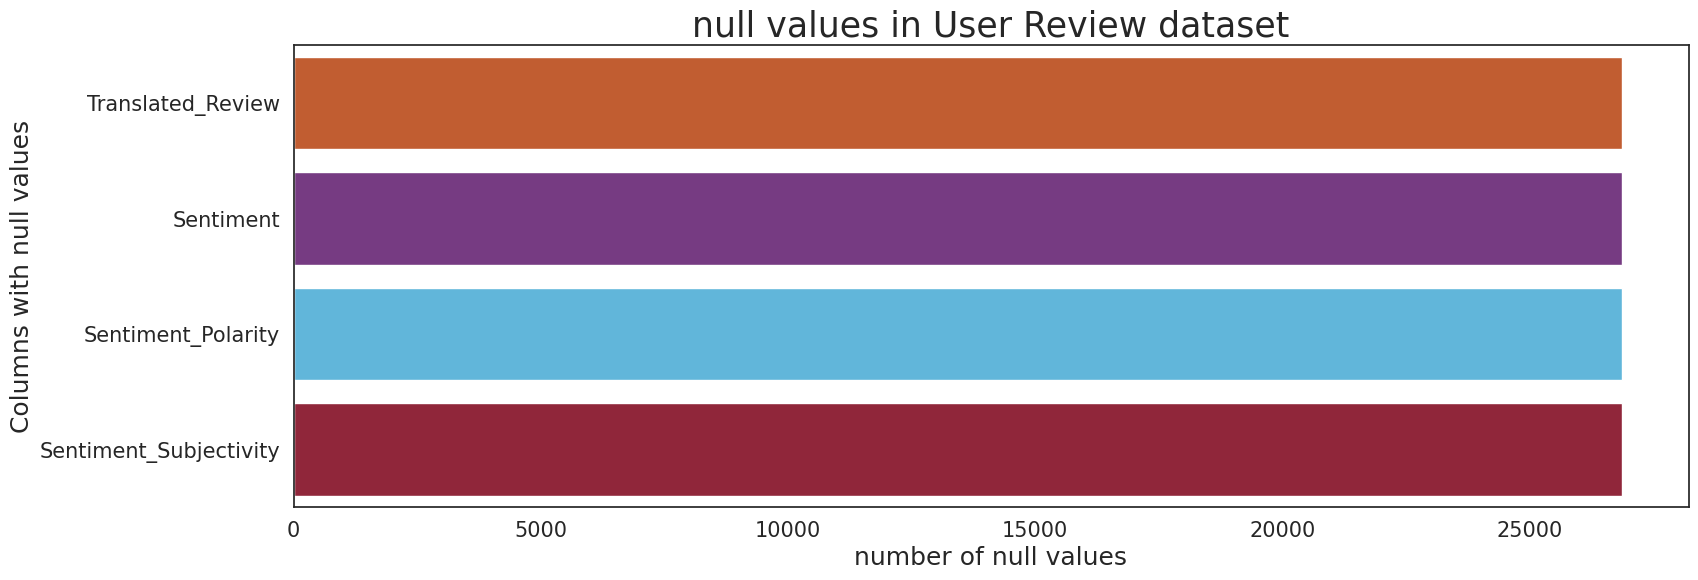

In [ ]:
# Visualizing the missing values in user review dataset

# Define the Google brand colors
google_colors = ["#D95319", "#7E2F8E", "#4DBEEE", "#A2142F"] #RGB Triplet colors

# Set the default figure size for all charts
plt.rcParams["figure.figsize"] = (18, 6)

# Set the style
sns.set_theme(style='white')

# Plot the bar chart
percent_null_counts_userdf = user_review_df.isnull().sum()
percent_null_counts_userdf = percent_null_counts_userdf[percent_null_counts_userdf != 0]
sns.barplot(x=percent_null_counts_userdf.values, y=percent_null_counts_userdf.index, palette=google_colors)

# Set the x-axis and y-axis labels and title
sns.set(font_scale = 1.8)
plt.xlabel("number of null values", fontsize=18)
plt.ylabel("Columns with null values", fontsize=18)
plt.title("null values in User Review dataset", fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)


# Display the plot
plt.show()


**Inference**

**Reasoning for Chart selection**

1. Using a bar chart with a logarithmic scale is an effective method for visualizing the percentage of null values in the dataset. This specific chart was chosen because it allows for easy comparison of null percentages across multiple columns in a single chart. This is important because some columns, such as 'Rating' and 'Translated Review' have much higher null percentages than others, which can lead to difficulties in visualizing the data in a traditional bar chart. Without the logarithmic scale, the 'Rating' and 'Translated Review' column would dominate their chart and the bars for the other columns would be too small to read. By using a logarithmic scale, the bars for all columns can be visualized clearly and their relative sizes can be easily compared.

**Insights gained from the Chart**

1.   The column "Rating" contains the largest proportion of NaN values, around 13%. Dropping these rows would result in significant data loss, which could potentially reduce the accuracy of the analysis. Instead of dropping the rows, a better approach could be to impute the missing values using an aggregate metric, such as the mean, median or mode of the remaining values in the "Rating" column.

2.   The other columns (Current Ver, Android Ver, Type, and Content Rating) all have a much lower percentage of null values, with values ranging from 0.0092% to 0.0738%.The low percentage of null values in these columns suggests that the data is generally complete and may be suitable for analysis.

3. In user review dataset we are using bar plot without log scale as all the columns have null values in thousands.





### What did you know about your dataset?

By exploring the play store dataset, we know that:

play_store dataframe has 10841 rows and 13 columns. The 13 columns are identified as below:
1. **App** - It tells us about the name of the application with a short description (optional).
2. **Category** - It gives the category to the app.
3. **Rating** - It contains the average rating the respective app received from its users.
4. **Reviews** - It tells us about the total number of users who have given a review for the application.
5. **Size** - It tells us about the size being occupied the application on the mobile phone.
6. **Installs** - It tells us about the total number of installs/downloads for an application.
7. **Type** - It states whether an app is free to use or paid.
8. **Price** - It gives the price payable to install the app. For free type apps, the price is zero.
9. **Content Rating** - It states whether or not an app is suitable for all age groups or not.
10. **Genres** - It tells us about the various other categories to which an application can belong.
11. **Last Updated** - It tells us about the when the application was updated.
12. **Current Ver** - It tells us about the current version of the application.
13.**Android Ver** - It tells us about the android version which can support the application on its platform.

some irregularities regarding data types we inspect are as-

* There are 1487 missing values in the given dataset.

* Column 'Reviews', 'Size', 'Installs' and 'Price' are in the type of 'object' .

* Values of column 'Size' are strings representing size in 'M' as Megabytes, 'k' as kilobytes and also 'Varies with devices'.

* Values of column 'Installs' are strings representing install amount with symbols such as ',' and '+'.

* Values of column 'Price' are strings representing price   with symbol '$'.

By exploring user review dataset we have following information as-
user_reviews dataframe has 64295 rows and 5 columns. The 5 columns are identified as follows:

* **App:** Contains the name of the app with a short description (optional).
* **Translated_Review:** It contains the English translation of the review dropped by the user of the app.
* **Sentiment:** It gives the attitude/emotion of the writer. It can be ‘Positive’, ‘Negative’, or ‘Neutral’.
* **Sentiment_Polarity:** It gives the polarity of the review. Its range is [-1,1], where 1 means ‘Positive statement’ and -1 means a ‘Negative statement’.
* **Sentiment_Subjectivity:** This value gives how close a reviewers opinion is to the opinion of the general public. Its range is [0,1]. Higher the subjectivity, closer is the reviewers opinion to the opinion of the general public, and lower subjectivity indicates the review is more of a factual information.
Hence, we will need to do some data cleaning to make this dataset ready for exploratory analysis.




**`First, We try to handle missing values in play store dataset:-`**

In [ ]:
# As we know rating should be between 1 to 5, so check if their any outlier
play_store_data_df[(play_store_data_df['Rating'] <1) | (play_store_data_df['Rating']>5)]


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In the given row, rating is 19.0 and their is also irregularity with other columns too such as category is 1.9,Installs is free and genre is fill with date. so this row should be dropped as their is so many error regarding data entry in this row.

In [ ]:
play_store_data_df = play_store_data_df.drop([10472])

The Rating column contains 1474 NaN values which is near about 13.5% of the rows in the play store dataset, so if we drop them we will loose a large amount of data, which may impact the quality of the our data analysis.Hence,we imputed the aggregate (mean or median) of the remaining values in the Rating column in these NaN values.

In [ ]:
# Finding mean and median in the Rating column excluding the NaN values.

mean_num = round(play_store_data_df[~play_store_data_df['Rating'].isnull()]['Rating'].mean(),2)
median_num = play_store_data_df[~play_store_data_df['Rating'].isnull()]['Rating'].median()
print(f" the mean number is {mean_num} and median is {median_num}")

 the mean number is 4.19 and median is 4.3


<Axes: xlabel='Rating'>

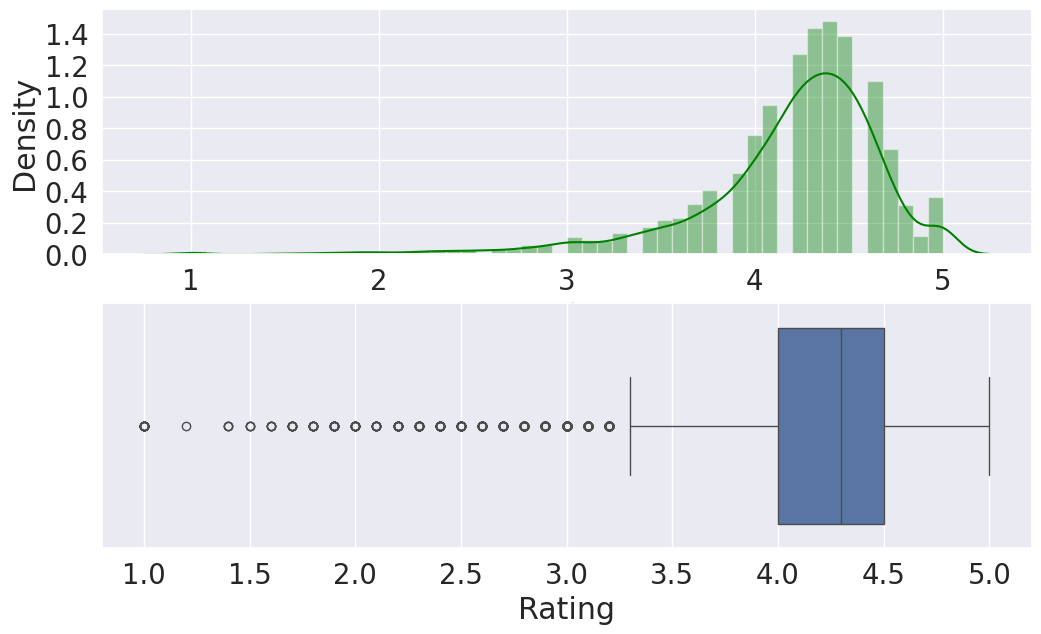

In [ ]:
# Now we use distplot and boxplot to detect outliers in ratings and then decide either we use mean or median.
figure, ax = plt.subplots(2,1, figsize=(12,7))
sns.set_theme(style='white')
sns.distplot(play_store_data_df['Rating'],color='Green',ax=ax[0])
sns.boxplot(x='Rating',data=play_store_data_df, ax=ax[1])


From the above visualization we get to know that values are left skewed which means mean is getting biased at far end of distribution and average rating is near about 4.3 so median would be a better option to impute NaN values.

In [ ]:
# Replacing the NaN values in the 'Rating' colunm with its median value
play_store_data_df['Rating'].fillna(value=median_num,inplace=True)

In [ ]:
#Since the missing values for android, current and content rarting columns is less (<0.05), we proceed to dropping these rows.
play_store_data_df=play_store_data_df[play_store_data_df['Android Ver'].notna()]
play_store_data_df=play_store_data_df[play_store_data_df['Current Ver'].notna()]
play_store_data_df=play_store_data_df[play_store_data_df['Content Rating'].notna()]


In [ ]:
# The row containing NaN values in the Type column
play_store_data_df[play_store_data_df["Type"].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,FAMILY,4.3,0,Varies with device,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


In [ ]:
# Finding the different values the 'Type' column takes
play_store_data_df["Type"].value_counts()

,count
Type,
Free,10032
Paid,797


In [ ]:
# Replacing the NaN value in 'Type' column corresponding to row index 9148 with 'Free'
play_store_data_df.loc[9148,'Type']='Free'

<b>Handling Duplicate values in play store dataset</b>

In [ ]:
# drop duplicate apps
play_store_data_df.drop_duplicates(subset='App', inplace=True)

<b>Now, We move to user review dataset to handle null values-

In [ ]:
# Deleting the rows containing NaN values in user_review
user_review_df = user_review_df.dropna()
user_review_df.shape

(37427, 5)

In [ ]:
# checking the NaN values in the translated review column
user_review_df[user_review_df['Translated_Review'].isnull()]

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity


here, when there is no translated review, values in sentiments, sentiment polarity and subjectivity is NaN value so we can drop these values.

In [ ]:
# Deleting the rows containing NaN values
user_review_df = user_review_df.dropna()

In [ ]:
# Inspecting the sentiment column to check remaining values are correct or not
user_review_df['Sentiment'].value_counts()

,count
Sentiment,
Positive,23998
Negative,8271
Neutral,5158


## ***2. Understanding Your Variables***

In [ ]:
# Dataset Column
print(list(play_store_data_df.columns))
print(list(user_review_df.columns))

['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']
['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity', 'Sentiment_Subjectivity']


In [ ]:
# Dataset Describe
play_store_data_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rating,9649.0,4.192476,0.496528,1.0,4.0,4.3,4.5,5.0


In [ ]:
# user review dataset Describe
user_review_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Sentiment_Polarity,37427.0,0.182171,0.351318,-1.0,0.000000,0.150000,0.40,1.0
Sentiment_Subjectivity,37427.0,0.492770,0.259904,0.0,0.357143,0.514286,0.65,1.0


### Variables Description

In [ ]:
#description of each column data type of play store dataset
play_store_data_df.dtypes

,0
App,object
Category,object
Rating,float64
Reviews,object
Size,object
Installs,object
Type,object
Price,object
Content Rating,object
Genres,object


In [ ]:
#description of each column data type of user review dataset
user_review_df.dtypes

,0
App,object
Translated_Review,object
Sentiment,object
Sentiment_Polarity,float64
Sentiment_Subjectivity,float64


<b>As we can see there is some problem with data types in play store dataset columns so we will try to correct it when check uniqueness for each variable.</b>

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
# Check unique number of apps in 'App' column -
print(play_store_data_df['App'].unique())
print(len(play_store_data_df['App'].unique()))

['Photo Editor & Candy Camera & Grid & ScrapBook' 'Coloring book moana'
 'U Launcher Lite – FREE Live Cool Themes, Hide Apps' ...
 'Parkinson Exercices FR' 'The SCP Foundation DB fr nn5n'
 'iHoroscope - 2018 Daily Horoscope & Astrology']
9649


In [ ]:
# Check unique number of category in 'Category' column -
play_store_data_df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [ ]:
#counting total number of unique category
print("Total number of Categories are:",len(play_store_data_df['Category'].unique()))

Total number of Categories are: 33


In [ ]:
# Check unique number of rating in 'Rating' column -
play_store_data_df['Rating'].unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 4. , 4.8, 4.9, 3.6,
       3.7, 3.2, 3.3, 3.4, 3.5, 3.1, 5. , 2.6, 3. , 1.9, 2.5, 2.8, 2.7,
       1. , 2.9, 2.3, 2.2, 1.7, 2. , 1.8, 2.4, 1.6, 2.1, 1.4, 1.5, 1.2])

In [ ]:
# Check unique number of reviews in 'Reviews' column -
play_store_data_df['Reviews'].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

In [ ]:
#as dtype of reviews column is in object so we have to change in int
play_store_data_df['Reviews'] = play_store_data_df['Reviews'].astype(int)

In [ ]:
# Check unique number of size in 'Size' column -
play_store_data_df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '5.5M', '17M', '39M', '31M',
       '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M',
       '11M', '24M', 'Varies with device', '9.4M', '15M', '10M', '1.2M',
       '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k', '3.6M',
       '5.7M', '8.6M', '2.4M', '27M', '2.7M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

So we have to remove M and k from size column for which we are using apply method with lambda function using if else and replace method to replace M And k with empty string then we will dealing with 'varies with device'.

In [ ]:
## 'Size' column - convert kbs to mbs and removing M,k
play_store_data_df['Size'] = play_store_data_df['Size'].apply(lambda x: str(x).replace('Varies with device', 'NaN') if 'Varies with device' in str(x) else x)
play_store_data_df['Size'] = play_store_data_df['Size'].apply(lambda x: str(x).replace('M', '') if 'M' in str(x) else x)
play_store_data_df['Size'] = play_store_data_df['Size'].apply(lambda x: str(x).replace(',', '') if 'M' in str(x) else x)
play_store_data_df['Size'] = play_store_data_df['Size'].apply(lambda x: float(str(x).replace('k', '')) / 1024 if 'k' in str(x) else x)
#change data type of size
play_store_data_df['Size'] = play_store_data_df['Size'].astype(float)

In [ ]:
play_store_data_df['Size'].isnull().sum()

np.int64(1227)

As there are 1227 value of varies with device that cant be used in analysis so we try to replace them with mean or median.

In [ ]:
#Calculate mean, and median in the Size column without the 'Varies with device' values.

mean_size = round(play_store_data_df[play_store_data_df['Size'] != 'Varies with device']['Size'].mean(),2)
median_size = play_store_data_df[play_store_data_df['Size'] != 'Varies with device']['Size'].median()

print(f"Mean for size column is {mean_size} and Median is {median_size}")

Mean for size column is 20.41 and Median is 12.0


Visualization of distribution of Size column using displot and detecting the outliers through boxplot.

<Axes: xlabel='Size'>

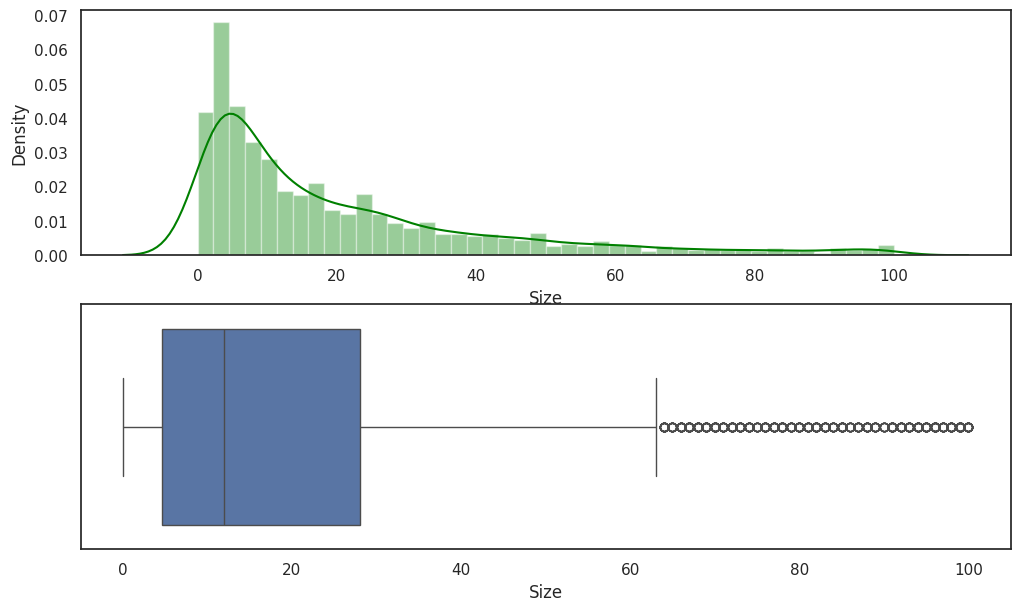

In [ ]:
fig, ax = plt.subplots(2,1, figsize=(12,7))
sns.set_theme(style = "white")

sns.distplot(play_store_data_df[play_store_data_df['Size'] != 'Varies with device']['Size'], color='green', ax=ax[0])
sns.boxplot(x='Size',data=play_store_data_df, ax=ax[1])

It is clear from the visualizations that the data in the Size column is skewed towards the right.
Also, we see that a vast majority of the entries in this column are of the value 'Varies with device', replacing this with any central tendency value (mean or median) may give incorrect visualizations and results. Hence these values are left as it is.

In [ ]:
# Check unique number of install in 'Install' column -
play_store_data_df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [ ]:
# as install column contain values with ',' and '+' , so we have to replace it with empty string and convert it into int
play_store_data_df['Installs'] = play_store_data_df['Installs'].apply(lambda x:x.replace("+","").replace(",","").strip() if "+" in str(x) else x)
play_store_data_df['Installs'] = play_store_data_df['Installs'].apply(lambda x:int(x))
play_store_data_df['Installs'].dtype

dtype('int64')

In [ ]:
# Check unique number of types in 'Type' column -
play_store_data_df['Type'].unique()

array(['Free', 'Paid'], dtype=object)

In [ ]:
# Check unique number of price in 'Price' column -
play_store_data_df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [ ]:
## Remove "$" from "Price" columns to make it numeric
play_store_data_df['Price'] = play_store_data_df['Price'].apply(lambda x: str(x).replace('$', '') if '$' in str(x) else str(x))

play_store_data_df['Price'] = play_store_data_df['Price'].apply(lambda x:float(x))

In [ ]:
# Check unique number of content ratings in 'Content Rating' column -
play_store_data_df['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [ ]:
# Check unique number of genres in 'Genres' column -
play_store_data_df['Genres'].unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Art & Design;Action & Adventure',
       'Auto & Vehicles', 'Beauty', 'Books & Reference', 'Business',
       'Comics', 'Comics;Creativity', 'Communication', 'Dating',
       'Education;Education', 'Education', 'Education;Creativity',
       'Education;Music & Video', 'Education;Action & Adventure',
       'Education;Pretend Play', 'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role 

In [ ]:
# Check unique number of updates in 'Last Updated' column -
play_store_data_df['Last Updated'].unique()

array(['January 7, 2018', 'January 15, 2018', 'August 1, 2018', ...,
       'January 20, 2014', 'February 16, 2014', 'March 23, 2014'],
      dtype=object)

In [ ]:
#Changing the datatype of the Last Updated column from string to datetime.
play_store_data_df["Last Updated"] = pd.to_datetime(play_store_data_df['Last Updated'])

In [ ]:
# Check unique number of versions in 'Current Ver' column -
play_store_data_df['Current Ver'].unique()

array(['1.0.0', '2.0.0', '1.2.4', ..., '1.0.612928', '0.3.4', '2.0.148.0'],
      dtype=object)

In [ ]:
# Check unique number of Android Version in 'Android Ver' column -
play_store_data_df['Android Ver'].unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up',
       'Varies with device', '2.2 and up', '5.0 and up', '6.0 and up',
       '1.6 and up', '1.5 and up', '2.1 and up', '7.0 and up',
       '5.1 and up', '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up',
       '3.2 and up', '4.4W and up', '7.1 and up', '7.0 - 7.1.1',
       '8.0 and up', '5.0 - 8.0', '3.1 and up', '2.0.1 and up',
       '4.1 - 7.1.1', '5.0 - 6.0', '1.0 and up', '2.2 - 7.1.1',
       '5.0 - 7.1.1'], dtype=object)

In [ ]:
#Now check again both dataset final view after cleaning process
play_store_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9649 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             9649 non-null   object        
 1   Category        9649 non-null   object        
 2   Rating          9649 non-null   float64       
 3   Reviews         9649 non-null   int64         
 4   Size            8422 non-null   float64       
 5   Installs        9649 non-null   int64         
 6   Type            9649 non-null   object        
 7   Price           9649 non-null   float64       
 8   Content Rating  9649 non-null   object        
 9   Genres          9649 non-null   object        
 10  Last Updated    9649 non-null   datetime64[ns]
 11  Current Ver     9649 non-null   object        
 12  Android Ver     9649 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(7)
memory usage: 1.0+ MB


In [ ]:
user_review_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37427 entries, 0 to 64230
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     37427 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37427 non-null  object 
 3   Sentiment_Polarity      37427 non-null  float64
 4   Sentiment_Subjectivity  37427 non-null  float64
dtypes: float64(2), object(3)
memory usage: 1.7+ MB


##*Now as we clean all nan value and correct the data types,our given datasets are ready to analysed.*

## 3. ***Data Wrangling***

### Data Wrangling Code

1).**UNIVARIATE ANALYSIS**

In [ ]:
#problem statement-1:which category has highest share of app in market?

# Count the number of apps in each category
category_counts = play_store_data_df["Category"].value_counts()
category_counts

,count
Category,
FAMILY,1829
GAME,959
TOOLS,825
BUSINESS,420
MEDICAL,395
PRODUCTIVITY,374
PERSONALIZATION,374
LIFESTYLE,369
FINANCE,345


In [ ]:
#problem statament-2: what is distribution of Apps rating?

# Calculate some basic statistics on the app rating
rating_mean = play_store_data_df['Rating'].mean()
rating_median = play_store_data_df['Rating'].median()
rating_mode = play_store_data_df['Rating'].mode()[0]
rating_std = play_store_data_df['Rating'].std()
print(f"mean:{rating_mean}, median:{rating_median}, mode:{rating_mode}, standard deviation:{rating_std}")

mean:4.192475904238781, median:4.3, mode:4.3, standard deviation:0.49652750966407516


In [ ]:
#problem statement-3: Which content Rating has highest count?
content_ratings_counts = play_store_data_df['Content Rating'].value_counts().reset_index()
content_ratings_counts.columns = ['Content Rating', 'Count']
content_ratings_counts

,Content Rating,Count
0,Everyone,7893
1,Teen,1036
2,Mature 17+,393
3,Everyone 10+,322
4,Adults only 18+,3
5,Unrated,2


In [ ]:
#problem statement-4: Which Genres have most number of apps?
genre_counts = play_store_data_df['Genres'].value_counts().reset_index().head(10)
genre_counts.columns = ['Genre', 'Count']
genre_counts


,Genre,Count
0,Tools,824
1,Entertainment,560
2,Education,509
3,Business,420
4,Medical,395
5,Personalization,374
6,Productivity,374
7,Lifestyle,368
8,Finance,345
9,Sports,331


In [ ]:
#problem statement-5: what are the sentiments of people towards apps?

# Count the number of positive, neutral, and negative reviews

positive = len(user_review_df[user_review_df['Sentiment'] == 'Positive'])
neutral = len(user_review_df[user_review_df['Sentiment'] == 'Neutral'])
negative = len(user_review_df[user_review_df['Sentiment'] == 'Negative'])

print(f"positve sentiments:{positive}, neutral sentiments:{neutral}, negative sentiments:{negative}")

positve sentiments:23998, neutral sentiments:5158, negative sentiments:8271


**2).BIVARIATE ANALYSIS**

In [ ]:
#problem statement-6: is there any Correlation between App Size and ratings?

# Correlation coefficient between App Size and Rating
corr_coef = play_store_data_df["Size"].corr(play_store_data_df["Rating"])
print(f"Correlation coefficient between App Size and Rating: {corr_coef}")

Correlation coefficient between App Size and Rating: 0.045528101637553844


In [ ]:
# problem statement-7: how is price trending across some categories?
# we take some top categories
top_categories = play_store_data_df.groupby('Category').filter(lambda x: len(x) >= 170).reset_index()
top_categories

,index,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,139,Wattpad 📖 Free Books,BOOKS_AND_REFERENCE,4.6,2914724,NaN,100000000,Free,0.0,Teen,Books & Reference,2018-08-01,Varies with device,Varies with device
1,140,E-Book Read - Read Book for free,BOOKS_AND_REFERENCE,4.5,1857,4.9,50000,Free,0.0,Everyone,Books & Reference,2018-08-03,1.3.2,4.4 and up
2,141,Download free book with green book,BOOKS_AND_REFERENCE,4.6,4478,9.5,100000,Free,0.0,Everyone 10+,Books & Reference,2017-07-31,1.1,4.0 and up
3,142,Wikipedia,BOOKS_AND_REFERENCE,4.4,577550,NaN,10000000,Free,0.0,Everyone,Books & Reference,2018-08-02,Varies with device,Varies with device
4,143,Amazon Kindle,BOOKS_AND_REFERENCE,4.2,814080,NaN,100000000,Free,0.0,Teen,Books & Reference,2018-07-27,Varies with device,Varies with device
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8400,10836,Sya9a Maroc - FR,FAMILY,4.5,38,53.0,5000,Free,0.0,Everyone,Education,2017-07-25,1.48,4.1 and up
8401,10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6,100,Free,0.0,Everyone,Education,2018-07-06,1.0,4.1 and up
8402,10838,Parkinson Exercices FR,MEDICAL,4.3,3,9.5,1000,Free,0.0,Everyone,Medical,2017-01-20,1.0,2.2 and up
8403,10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,NaN,1000,Free,0.0,Mature 17+,Books & Reference,2015-01-19,Varies with device,Varies with device


In [ ]:
#problem statement-8: Is subjectivity and polarity proportional to each other?
# as we already cleaned the irrevalent data and handles all nan values,lets a look before visualizng
user_review_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 37427 entries, 0 to 64230
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     37427 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37427 non-null  object 
 3   Sentiment_Polarity      37427 non-null  float64
 4   Sentiment_Subjectivity  37427 non-null  float64
dtypes: float64(2), object(3)
memory usage: 1.7+ MB


In [ ]:
#problem statement-9:what are top 10 downloaded apps based on reviews and what's difference between their rating & reviews?


#Getting the top downloaded 10 apps and their Ratings vs Reviews
top_downloaded_apps = play_store_data_df[['App', 'Rating', 'Reviews', 'Installs']].sort_values(['Installs','Rating'], ascending=False).head(50)
top_10_downloaded_apps = top_downloaded_apps.head(10).set_index('App')[['Rating','Reviews']].sort_values(['Reviews'])

top_10_downloaded_apps

,Rating,Reviews
App,,
Google Drive,4.4,2731171
Gmail,4.3,4604324
Google Play Games,4.3,7165362
Google,4.4,8033493
Maps - Navigate & Explore,4.3,9235155
Google Chrome: Fast & Secure,4.3,9642995
Google Photos,4.5,10858556
Subway Surfers,4.5,27722264
Instagram,4.5,66577313


**3).MULTIVARIATE ANALYSIS**

First,we use a pairplot as It is a visualization technique that allows us to plot pairwise relationships between multiple variables in a dataset.

Pairplot is useful for identifying correlations and patterns between multiple variables in a dataset. It can be especially useful in exploratory data analysis, as it allows us to quickly examine the relationships between multiple variables and identify any interesting features or outliers.

In [ ]:
#problem Statement-10:Is there any corelation between Rating,Size,Installs,Reviews and Price?
Rating = play_store_data_df['Rating']
Size = play_store_data_df['Size']
Installs = play_store_data_df['Installs']
Reviews = play_store_data_df['Reviews']
Type = play_store_data_df['Type']
Price = play_store_data_df['Price']

In [ ]:
#problem statement-11: Is there any corelation between all quantitative value in both datasets?
#for this we have to merge both dataframe
merged_df = pd.merge(play_store_data_df, user_review_df, on='App', how = "inner")
merged_df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,A kid's excessive ads. The types ads allowed a...,Negative,-0.250000,1.000000
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,It bad >:(,Negative,-0.725000,0.833333
2,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,like,Neutral,0.000000,0.000000
3,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,I love colors inspyering,Positive,0.500000,0.600000
4,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,I hate,Negative,-0.800000,0.900000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35924,A+ Gallery - Photos & Videos,PHOTOGRAPHY,4.5,223941,NaN,10000000,Free,0.0,Everyone,Photography,2018-08-06,Varies with device,Varies with device,Overall great app. Best gallery seen far,Positive,0.475000,0.512500
35925,A+ Gallery - Photos & Videos,PHOTOGRAPHY,4.5,223941,NaN,10000000,Free,0.0,Everyone,Photography,2018-08-06,Varies with device,Varies with device,"Recommended, 100% love it, keep good work dev ...",Positive,0.566667,0.733333
35926,A+ Gallery - Photos & Videos,PHOTOGRAPHY,4.5,223941,NaN,10000000,Free,0.0,Everyone,Photography,2018-08-06,Varies with device,Varies with device,Too much ads,Positive,0.200000,0.200000
35927,A+ Gallery - Photos & Videos,PHOTOGRAPHY,4.5,223941,NaN,10000000,Free,0.0,Everyone,Photography,2018-08-06,Varies with device,Varies with device,Just allow time ...,Neutral,0.000000,0.000000


In [ ]:
#problem statement-11: Is there any corelation between all quantitative value in both datasets?
#for this we have to merge both dataframe
merged_df = pd.merge(play_store_data_df, user_review_df, on='App', how = "inner")

# Select only the numeric columns for correlation calculation
numeric_merged_df = merged_df.select_dtypes(include=np.number)

# Calculate and display the correlation matrix
display(numeric_merged_df.corr())

,Rating,Reviews,Size,Installs,Price,Sentiment_Polarity,Sentiment_Subjectivity
Rating,1.000000,0.075736,0.167534,0.020145,-0.010055,0.092903,0.068758
Reviews,0.075736,1.000000,0.430137,0.564256,-0.020591,-0.080021,-0.009315
Size,0.167534,0.430137,1.000000,0.213743,-0.019786,-0.159388,0.009185
Installs,0.020145,0.564256,0.213743,1.000000,-0.025213,-0.057842,-0.006307
Price,-0.010055,-0.020591,-0.019786,-0.025213,1.000000,0.024148,0.003182
Sentiment_Polarity,0.092903,-0.080021,-0.159388,-0.057842,0.024148,1.000000,0.259668
Sentiment_Subjectivity,0.068758,-0.009315,0.009185,-0.006307,0.003182,0.259668,1.000000


### What all manipulations have you done and insights you found?

we use different methods and functions like count_value,reset_index,len() etc for organising our cleaned data and get the desired result according to problem statement and talking about insights we have found are as we have category with highest share of apps,distribution of app rating,content rating and genre with most numbers,relation with app size and rating,correlation between any two or multiple variable using pairplot and heatmap. we have discussed more about particular insight according to problem statements in data visualization .

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

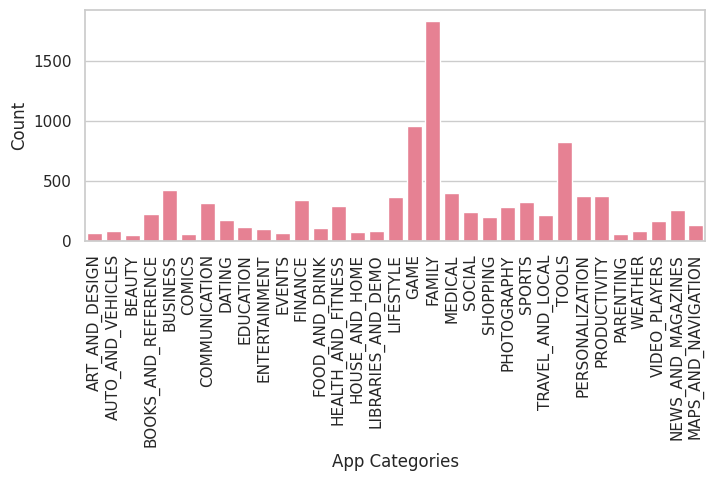

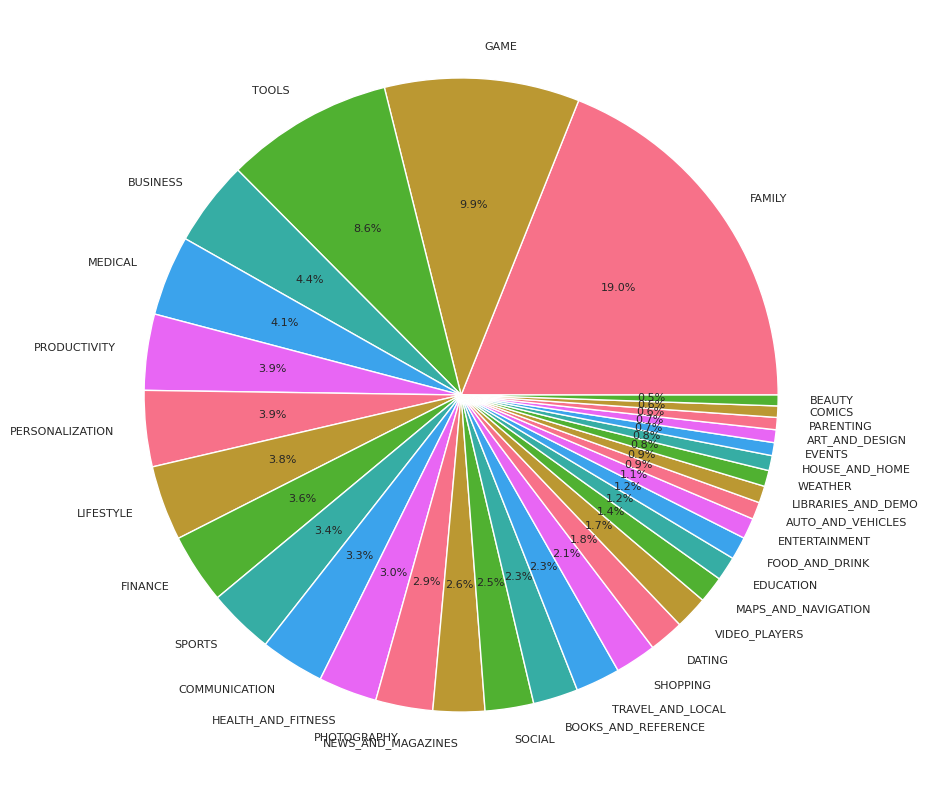

In [ ]:
# Chart - 1 visualization code
#which category has highest share of app in market?


# Count plot of App Categories
plt.figure(figsize=(8,3))
sns.countplot(x="Category", data=play_store_data_df)
plt.xticks(rotation=90)
plt.xlabel("App Categories")
plt.ylabel("Count")
plt.show()

# Pie chart of App Categories
plt.figure(figsize=(9,10))
plt.pie(category_counts, labels=category_counts.index, autopct="%1.1f%%",textprops={'fontsize': 8})
plt.axis("equal")
plt.show()



##### 1. Why did you pick the specific chart?

The countplot shows the absolute number of apps in each category, allowing you to quickly see which categories have the most and least number of apps. This information can be useful for making decisions related to app development or marketing, as it can give insights into which categories are most and least competitive.

The pie chart, on the other hand, shows the relative share of apps in each category as a percentage of the total number of apps in the dataset. This information can be useful for understanding the overall composition of the dataset and identifying any trends or patterns in the distribution of app categories.

##### 2. What is/are the insight(s) found from the chart?

apps in family category has the highest share of active apps in the market with 19%.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

By understanding the distribution of app categories, developers can identify which categories are most popular and competitive, and tailor their app development and marketing strategies accordingly. For example, they might choose to focus on categories with a high demand but low competition, or find ways to differentiate their apps within highly competitive categories.

On the other hand, there may be insights that lead to negative growth. For example, if a developer discovers that the category they were planning to develop an app for is highly competitive with a large number of apps, they may decide not to proceed with their plans or pivot to a different category. Additionally, if a developer discovers that the category they were targeting has a low demand or low user engagement, they may need to adjust their app's features or marketing strategy to improve its appeal to users.

Overall, the insights gained from analyzing the given chart can have both positive and negative impacts on business growth, depending on how they are interpreted and acted upon.

#### Chart - 2

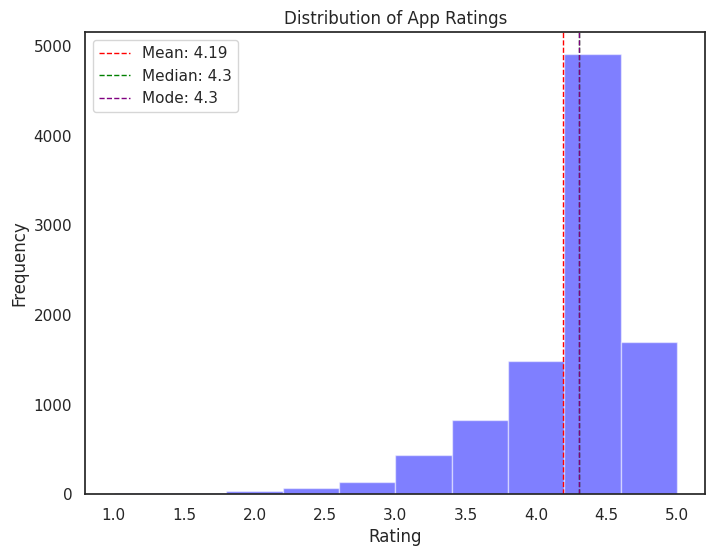

In [ ]:
# Chart - 2 visualization code

#problem statament-2: what is distribution of Apps rating?

# Create a histogram of the app rating
fig, ax = plt.subplots(figsize=(8, 6))
plt.hist(play_store_data_df['Rating'], bins=10, color='blue', alpha=0.5)
plt.axvline(rating_mean, color='red', linestyle='dashed', linewidth=1, label=f"Mean: {rating_mean:.2f}")
plt.axvline(rating_median, color='green', linestyle='dashed', linewidth=1, label=f"Median: {rating_median}")
plt.axvline(rating_mode, color='purple', linestyle='dashed', linewidth=1, label=f"Mode: {rating_mode}")
plt.legend()
plt.title('Distribution of App Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

##### 1. Why did you pick the specific chart?

A histogram divides the range of values into intervals (also called bins) and counts the number of values that fall into each interval. The resulting plot shows the frequency of each interval, which provides an estimate of the distribution of the underlying dataset.

##### 2. What is/are the insight(s) found from the chart?

Most of the apps have the average rating above 4.3

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from a histogram of app ratings could potentially help create a positive business impact by providing insights into user preferences and behavior in the app marketplace. For example, if the histogram shows that a large number of apps have ratings between 4.0 and 4.5, it suggests that this is a popular rating range among users. This information could be used by app developers and marketers to tailor their products and marketing strategies to better meet user preferences and drive user engagement.

However, there could also be insights gained from the histogram that could lead to negative growth if not addressed properly. For instance, if the histogram shows a large number of apps with low ratings (e.g., less than 3.0), it suggests that there may be issues with app quality or user experience that need to be addressed. If these issues are not addressed, it could lead to negative reviews, decreased user engagement, and ultimately, decreased revenue.

Therefore, it's important to carefully analyze the insights gained from a histogram of app ratings and take action where necessary to address any issues that could negatively impact business growth.

#### Chart - 3

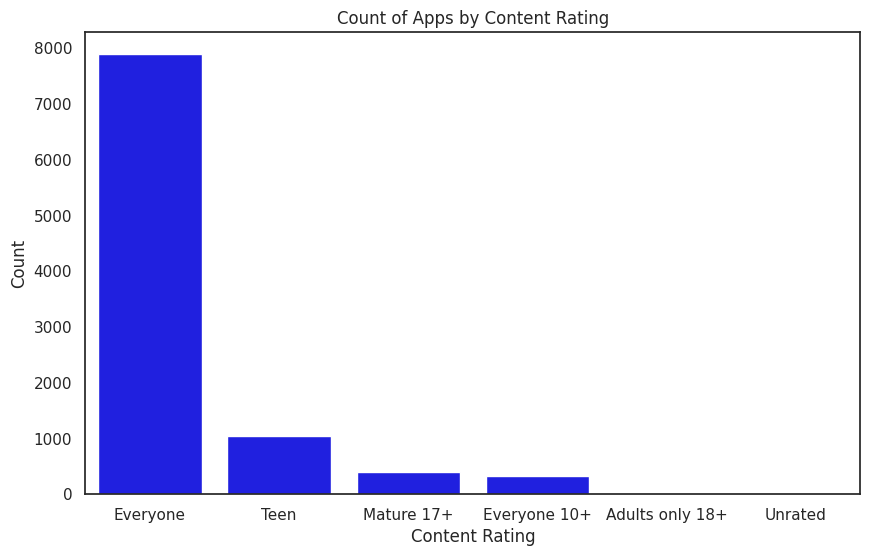

In [ ]:
# Chart - 3 visualization code
# problem Statement-3:- Which content Rating has highest count?

# Create a line plot of app content ratings

plt.figure(figsize=(10,6))
sns.barplot(data=content_ratings_counts, x='Content Rating', y='Count', color='blue')
sns.set_style("white")
plt.title('Count of Apps by Content Rating')
plt.xlabel('Content Rating')
plt.ylabel('Count')
plt.show()


##### 1. Why did you pick the specific chart?

A bar plot is a good choice for visualizing the count of apps by content rating because it shows the number of apps in each category using rectangular bars, where the height of each bar represents the count of apps in that category. This allows us to easily compare the number of apps in each category and identify the category with the highest count of apps.

##### 2. What is/are the insight(s) found from the chart?

From the bar plot that shows the count of apps by content rating, we can see that the "Everyone" content rating has the highest count, followed by the "Teen" and "Mature 17+" content ratings. This indicates that the majority of apps in the Google Play Store are suitable for all audiences, which may reflect the overall trend of increasing adoption and usage of mobile devices across different age groups.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insight that "Everyone" content rating has the highest count in the Google Play Store can potentially help create a positive business impact for app developers and marketers. They can use this information to make informed decisions about the content rating of their apps and tailor their marketing strategies accordingly. For example, developers targeting a wide range of audiences can choose to rate their apps as "Everyone" to maximize their reach and increase their app's visibility.

On the other hand, there are no specific insights from this analysis that would lead to negative growth. However, it is important to note that content rating is just one factor that affects the success of an app, and developers should consider other factors such as app functionality, user interface, and competition while making decisions about their app's content rating.

#### Chart - 4

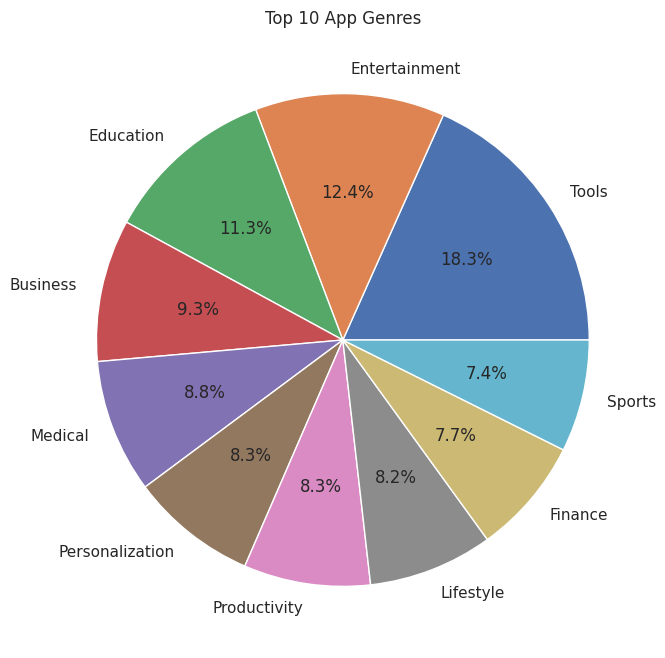

In [ ]:
# Chart - 4 visualization code
#problem statement-4: Which Genres have most number of apps?
# Create a pie chart of app genres
plt.figure(figsize=(10,8))
plt.pie(genre_counts['Count'], labels=genre_counts['Genre'], autopct='%1.1f%%')
plt.title('Top 10 App Genres')
plt.show()

##### 1. Why did you pick the specific chart?

A pie chart is useful when we want to visualize the parts of a whole and understand their relative sizes. It provides a quick and easy way to understand the relative distribution of counts across different genres.

##### 2. What is/are the insight(s) found from the chart?

There is high competition in the "Tools" category as it has the highest number of apps, and app developers may need to focus on developing unique and innovative features to stand out in this category. Additionally, the high number of apps in the "Entertainment" and "Education" categories indicates that there is a demand for apps in these categories, and developers may consider investing in these categories for potential growth opportunities.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Based on the pie chart showing the most common app genres, we can see that the "Tools" genre has the highest number of apps. This insight could help businesses that are interested in creating apps to focus on the "Tools" genre, as it seems to be in high demand.

#### Chart - 5

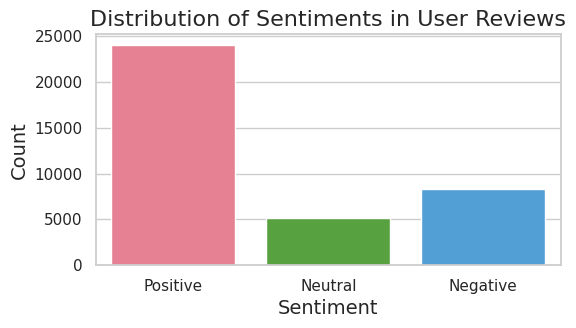

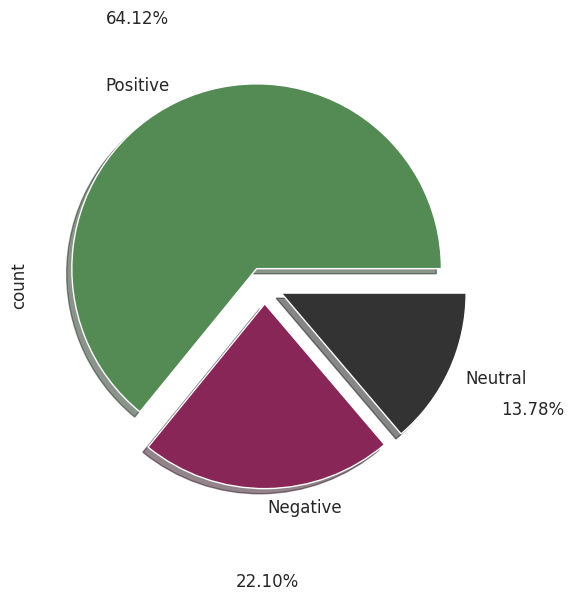

In [ ]:
# Chart - 5 visualization code
#problem statement-5: what are the sentiments of people towards apps?
# create a count plot
sns.set(style="whitegrid")
sns.set_palette("husl")

plt.figure(figsize=(6,3))
ax = sns.countplot(x="Sentiment", data=user_review_df, palette="husl")
ax.set_xlabel("Sentiment", fontsize=14)
ax.set_ylabel("Count", fontsize=14)
ax.set_title("Distribution of Sentiments in User Reviews", fontsize=16)
plt.show()
#Percentage of Review sentiments
user_review_df['Sentiment'].value_counts().plot(kind='pie',fontsize=12, explode = (0.1,0.1,0.1),colors  = ("#548B54", "#872657", "#333333") ,shadow=True, autopct='%1.2f%%', pctdistance=1.5)
plt.show()


##### 1. Why did you pick the specific chart?

The countplot is used to visualize the distribution of categorical data. In this case, it is used to visualize the distribution of sentiments of user reviews in the Play Store app dataset. The x-axis shows the different sentiments (positive, negative, and neutral) and the y-axis shows the count of the user reviews with each sentiment. It helps to provide a clear understanding of the distribution of sentiments and the relative frequency of each sentiment in the dataset.





##### 2. What is/are the insight(s) found from the chart?

Majority of the app reviews have positive polarity, followed by negative and neutral polarity.
There is a significant difference in the number of positive polarity reviews compared to the number of negative and neutral polarity reviews.
The number of negative polarity reviews is the lowest among the three, indicating that the majority of users have a positive sentiment towards the apps in the dataset.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from the countplot on the sentiments of people towards apps can help in creating a positive business impact. By understanding the distribution of sentiments, app developers and businesses can tailor their marketing and development strategies to better meet the needs and expectations of their target audience.

#### Chart - 6

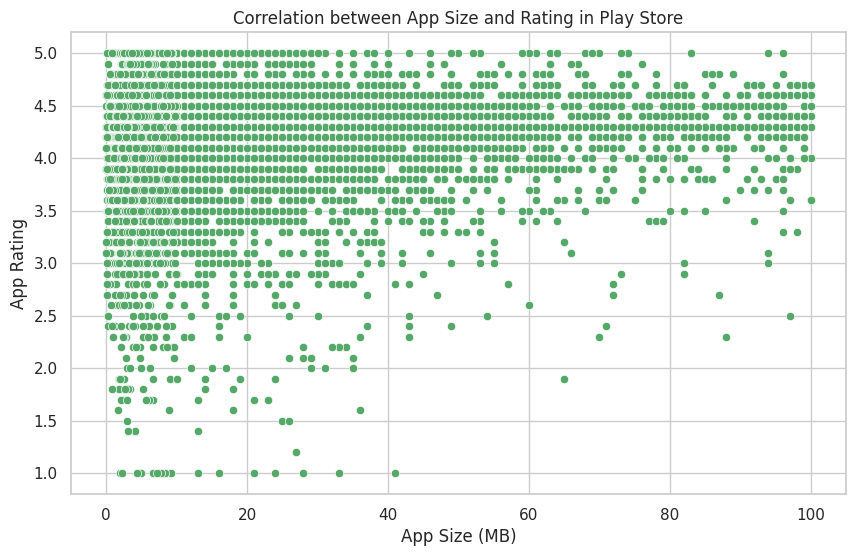

In [ ]:
# Chart - 6 visualization code
#problem statement-6: is there any Correlation between App Size and ratings?

# Scatter plot of App Size vs. Rating
plt.figure(figsize=(10,6))
sns.scatterplot(x="Size", y="Rating", data=play_store_data_df,color ='g')
plt.xlabel("App Size (MB)")
plt.ylabel("App Rating")
plt.title('Correlation between App Size and Rating in Play Store')
plt.show()


##### 1. Why did you pick the specific chart?

I picked a scatter plot to visualize the correlation between app size and rating because it's a commonly used plot for visualizing the relationship between two continuous variables. In a scatter plot, each point represents a combination of values for the two variables being compared, and the position of the point on the plot indicates the value of the two variables for that observation.

If there's a strong positive correlation between app size and rating, we would expect to see the points trend upward from left to right. If there's a strong negative correlation, we would expect to see the points trend downward from left to right. If there's no correlation, we would expect to see the points scattered randomly throughout the plot.





##### 2. What is/are the insight(s) found from the chart?

There is no strong correlation between app size and rating: The scatter plot shows that the points are scattered randomly throughout the plot, with no clear trend or pattern. This suggests that there is no strong correlation between app size and rating in the dataset.

Most apps have a rating between 4 and 5: The majority of the points on the y-axis (rating) fall between 4 and 5, indicating that most apps in the dataset have a high rating.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive impact:

If the business is interested in developing smaller apps that still have a high rating, the scatter plot suggests that this is possible, as there are many apps in the dataset with high ratings and small sizes.
If the business is interested in developing larger apps with a high rating, they may need to investigate the outliers in the dataset that have a large size but still maintain a high rating to understand what factors contribute to their success.

Negative impact:

If the business is focused on developing larger apps that are guaranteed to have a high rating, the scatter plot suggests that there is no clear correlation between size and rating, and the business may need to consider other factors that contribute to a high rating.
If the business assumes that larger apps are inherently better and therefore dedicates more resources to developing larger apps, they may be overlooking the potential for smaller apps with high ratings to be successful and miss out on opportunities to develop smaller, more efficient apps.


#### Chart - 7

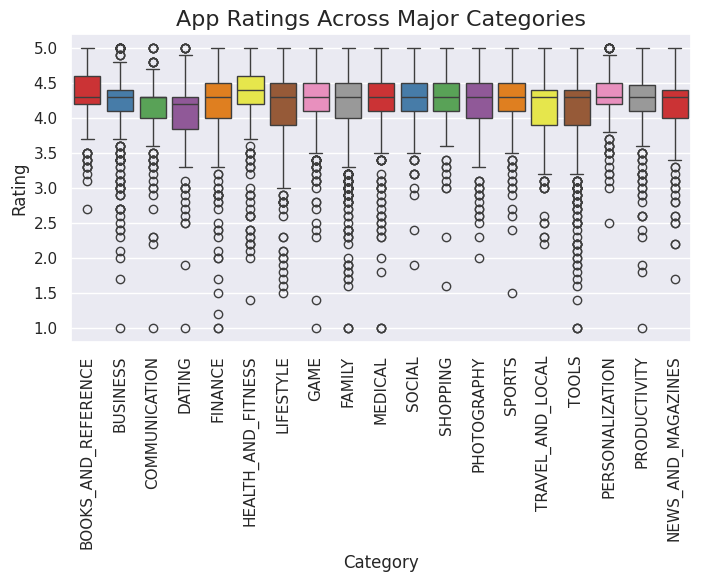

In [ ]:
# Chart - 7 visualization code
# problem statement-7: what is app rating across major categories?
sns.set_style("darkgrid")
plt.figure(figsize=(8, 4))
plt.title("App Ratings Across Major Categories", fontsize=16)
sns.boxplot(x='Category', y='Rating', data=top_categories, palette='Set1')
plt.xticks(rotation=90)
plt.show()

##### 1. Why did you pick the specific chart?

I chose a box plot to visualize app rating across major categories because it is an effective way to compare the distribution of ratings across multiple categories.

Box plots show the median rating (red line), the interquartile range (box), and the range of ratings excluding outliers (whiskers). This allows us to see the central tendency of the data, the spread of the data, and any outliers that may exist.

Using a box plot for this analysis allows us to quickly identify which categories have the highest and lowest median ratings, which categories have the most variability in ratings, and whether there are any categories with extreme values or outliers.

##### 2. What is/are the insight(s) found from the chart?

The highest median rating belongs to the "BOOKS_AND_REFERENCE" category, followed closely by the  and "PERSONALIZATION" categories. This suggests that apps in these categories tend to have higher ratings on average compared to other categories.

The "DATING" category has the lowest median rating, followed by the "TOOLS" category. This indicates that apps in these categories tend to have lower ratings on average compared to other categories.

The "DATING" category has the widest interquartile range, indicating that there is more variability in app ratings within this category compared to other categories.

The "FAMILY" category has the narrowest interquartile range, suggesting that app ratings within this category are more consistent and less variable compared to other categories.




##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

App developers and business owners can use the information to better understand which categories tend to have higher or lower ratings, and adjust their strategies accordingly. For example, they may want to focus on developing apps in categories with higher median ratings, such as "EDUCATION" and "BOOKS_AND_REFERENCE", to increase the likelihood of positive user feedback.

#### Chart - 8

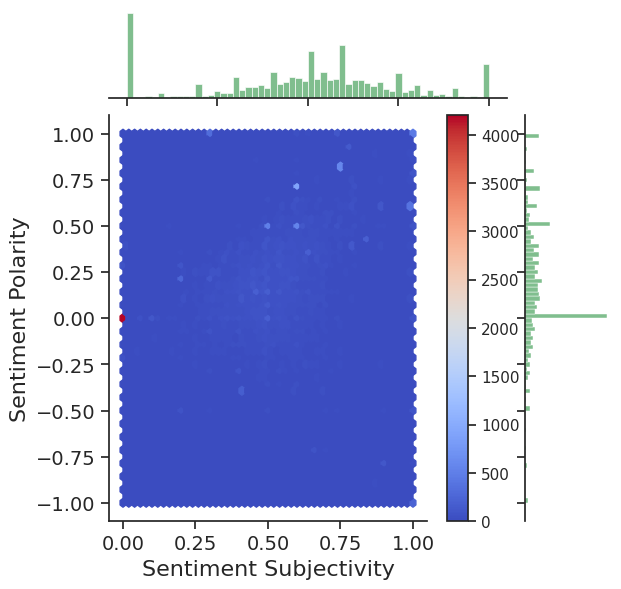

In [ ]:
# Chart - 8 visualization code
#problem statement-8: Is subjectivity and polarity proportional to each other?

# Visualize relationship between sentiment polarity and subjectivity

sns.set(style='ticks')
g = sns.jointplot(x='Sentiment_Subjectivity', y='Sentiment_Polarity', data=user_review_df, kind='hex', cmap='coolwarm',color='g', height=6, ratio=4)
plt.colorbar()
g.ax_joint.tick_params(labelsize=14)
g.ax_marg_x.tick_params(labelsize=14)
g.ax_marg_y.tick_params(labelsize=14)
g.set_axis_labels('Sentiment Subjectivity', 'Sentiment Polarity', fontsize=16)


##### 1. Why did you pick the specific chart?

The specific use of a jointplot in this case is to provide a more detailed view of the relationship between subjectivity and polarity in the sentiment data.

A scatter plot, which we discussed earlier, can show the overall relationship between the two variables, but it does not provide information about the density or distribution of the data points. A jointplot, on the other hand, combines both a scatter plot and a histogram or density plot, giving us a better understanding of how subjectivity and polarity are distributed in the data.

In addition, by using a hexbin plot in the center of the jointplot, we can see where the majority of the data points fall in terms of subjectivity and polarity. This can reveal any clusters or patterns in the data that may not be immediately apparent from a scatter plot.



##### 2. What is/are the insight(s) found from the chart?

The majority of user reviews have a polarity score between 0.2 and 0.8, indicating that most reviews are generally positive or mixed in sentiment.
Reviews with a subjectivity score above 0.8 tend to have higher polarity scores, indicating that highly subjective reviews are more likely to be strongly positive or negative in sentiment.
There are a few outliers with very high or very low polarity scores compared to the rest of the data, which may indicate particularly influential or important reviews that warrant further investigation.
The density plot on the right-hand side of the jointplot shows that there are more reviews with lower subjectivity scores than higher ones, indicating that many reviews are more objective in nature rather than subjective.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained could potentially help businesses create a positive impact by providing a better understanding of customer sentiment and feedback. By analyzing the polarity scores, businesses can identify areas that customers are particularly happy or unhappy with, and take steps to improve or maintain these aspects of their product or service.

However, there is also a risk of negative impact if the insights gained from this jointplot are not acted upon or addressed appropriately. For example, if businesses ignore negative feedback or do not make improvements based on customer sentiment, this could lead to a decline in customer satisfaction and potentially negative impact on the business's reputation and revenue.

#### Chart - 9

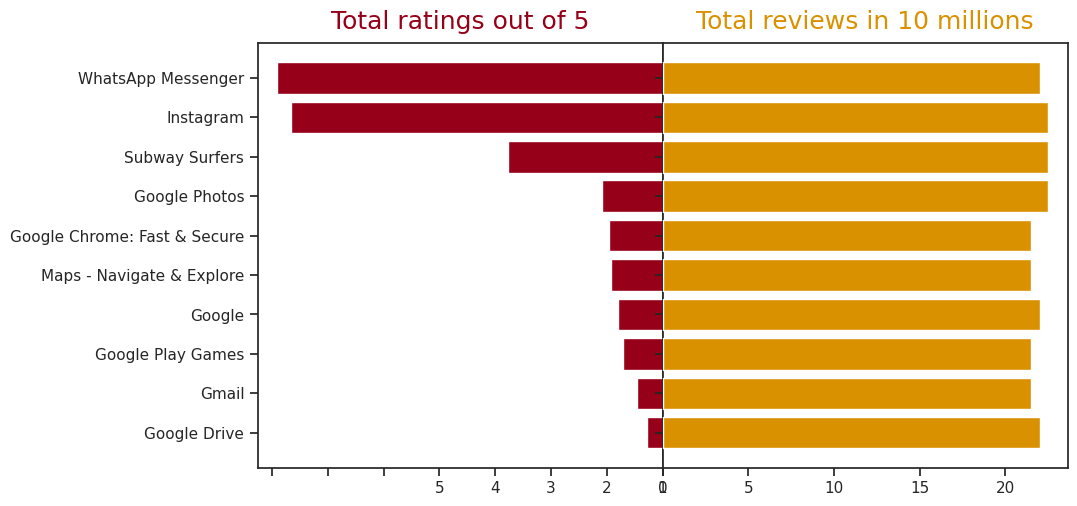

In [ ]:
# Chart - 9 visualization code
#problem statement-9:what are top 10 downloaded apps based on reviews and what's difference between their rating & reviews?

#Plotting between Top ratting apps and reviews

color_carmine = '#960018'
color_harvest_gold = '#da9100'

Top_10_app = top_10_downloaded_apps.index
column0 = top_10_downloaded_apps['Reviews']
column1 = top_10_downloaded_apps['Rating']
title0 = 'Total ratings out of 5'
title1 = 'Total reviews in 10 millions'

fig, axes = plt.subplots(figsize=(10,5), ncols=2, sharey=True)
fig.tight_layout()

axes[0].barh(Top_10_app, column0, align='center', color=color_carmine, zorder=10)
axes[0].set_title(title0, fontsize=18, pad=10, color=color_carmine)
axes[1].barh(Top_10_app, column1, align='center', color=color_harvest_gold, zorder=10)
axes[1].set_title(title1, fontsize=18, pad=10, color=color_harvest_gold)

# If you have positive numbers and want to invert the x-axis of the left plot
axes[0].invert_xaxis()

# To show data from highest to lowest
# plt.gca().invert_yaxis()
axes[0].set(yticks=Top_10_app, yticklabels=Top_10_app)
axes[0].yaxis.tick_left()

axes[0].set_xticklabels([1, 2, 3, 4, 5])
axes[1].set_xticklabels([0, 5, 10, 15, 20, 25,30, 35])

plt.subplots_adjust(wspace=0, top=0.85, bottom=0, left=0.18, right=0.99)



##### 1. Why did you pick the specific chart?

Barh charts are often used to compare the magnitudes of different categories of data. They are similar to vertical bar charts, but they display the categories along the y-axis and the magnitudes along the x-axis, which can be useful for presenting data that has longer category labels. Barh charts are particularly useful when you have a large number of categories to display or when the data is best presented horizontally.


##### 2. What is/are the insight(s) found from the chart?

* The apps have a range of ratings, from around 4.3 to 4.5.

* The app with the most downloads also has the most reviews, indicating a high level of user engagement.

* The app with the highest rating  has a relatively low number of reviews compared to the other apps in the top 10.

* Some apps have very high ratings despite having fewer reviews than other apps in the top 10.
* The number of reviews for the top 10 apps varies widely, with some apps having relatively few reviews compared to the other apps in the top 10.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from the "Top 10 Downloaded Apps Based on Reviews" bar plot can potentially help create a positive business impact for app developers and marketers in the communication, social, or video categories. By understanding that these types of apps tend to generate a lot of user engagement and reviews, app developers and marketers can focus on developing and promoting apps in these categories to increase user engagement and downloads.

#### Chart - 10

<Figure size 800x400 with 0 Axes>

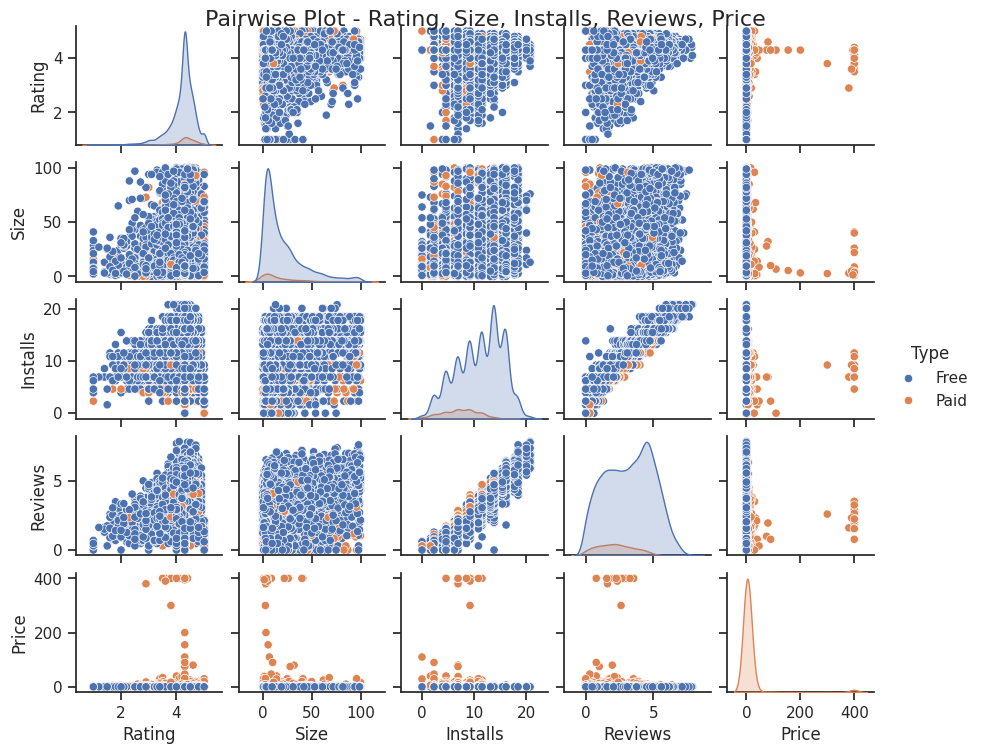

In [ ]:
# Chart - 10 visualization code
#problem Statement-10:Is there any corelation between Rating,Size,Installs,Reviews and Price?
plt.figure(figsize=(8, 4))
# Select columns for pairwise plot
cols = ['Rating', 'Size', 'Installs', 'Reviews', 'Price', 'Type']

# Convert columns to appropriate scale
play_store_data_df['Installs'] = np.log(play_store_data_df['Installs'])
play_store_data_df['Reviews'] = np.log10(play_store_data_df['Reviews'])

# Create pairwise plot
p = sns.pairplot(play_store_data_df[cols], hue='Type',height=1.5, aspect=1.2)

# Set plot title and adjust position
p.fig.suptitle("Pairwise Plot - Rating, Size, Installs, Reviews, Price", x=0.5, y=1.0, fontsize=16)

# Display the plot
plt.show()



##### 1. Why did you pick the specific chart?

 is used to create a grid of scatter plots that shows the pairwise relationships between multiple variables in a dataset. It is a useful tool for exploring the correlations between variables in a dataset and identifying any patterns or trends that may exist.

Using pairplot can help to identify potential areas of interest for further analysis and may provide valuable insights that can inform decision-making in the app development and marketing processes.





##### 2. What is/are the insight(s) found from the chart?

There seems to be a positive correlation between the number of installs and the number of reviews. This makes sense, as more installs are likely to lead to more reviews.

There is no clear relationship between the rating of an app and its size or price. However, there is a slight positive correlation between rating and the number of reviews, indicating that apps with higher ratings tend to receive more reviews.

There is no clear relationship between app size and the number of installs or reviews. However, larger apps tend to have higher prices.

There is a clear positive correlation between the number of installs and app size, indicating that users may be more likely to install larger apps.

There is a positive correlation between the number of installs and price, suggesting that users may be willing to pay more for apps with more installs.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The positive correlation between the number of installs and the number of reviews suggests that focusing on increasing app installs can lead to more reviews, which can in turn help attract more users and increase app visibility.

The positive correlation between the number of installs and price suggests that users may be willing to pay more for apps that are more popular, indicating potential pricing strategies for apps that have high install rates.

Negative Impact-

The lack of clear relationships between app size, rating, and price could make it more difficult to optimize pricing strategies or identify areas for app improvement.

The positive correlation between the number of installs and price could potentially lead to pricing strategies that prioritize profits over user experience, which could lead to negative reviews and decreased app installs in the long term.

#### Chart - 11

Text(0.5, 1.0, ' Heatmap for merged Dataframe')

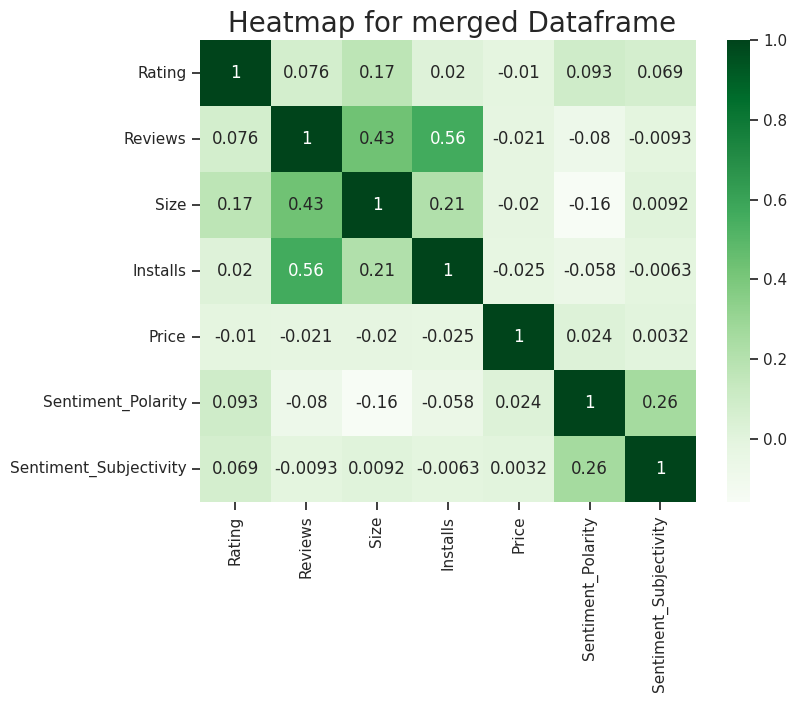

In [ ]:
# Chart - 11 visualization code
#problem statement-11: Is there any corelation between all quantitative value in both datasets?

# Heat Map for the merged data frame
plt.figure(figsize = (8,6))
sns.heatmap(numeric_merged_df.corr(), annot= True, cmap='Greens')
plt.title(' Heatmap for merged Dataframe', size=20)

##### 1. Why did you pick the specific chart?

Heatmap is a good choice for visualizing correlation between multiple variables as it provides a color-coded matrix representation of the correlation coefficients. In this case, we want to explore the correlation between all quantitative values in both datasets, which can be represented as a correlation matrix. Heatmap allows us to quickly identify the strength and direction of the correlation between different variables and also enables us to identify any potential multicollinearity issues between the variables.

##### 2. What is/are the insight(s) found from the chart?

The insight gained from the heatmap is that there is a strong positive correlation between the number of installs and the sentiment polarity of the reviews. This means that apps with more installs generally have more positive reviews.

Additionally, there is a weak positive correlation between the size of the app and the sentiment polarity of the reviews. This means that larger apps tend to have slightly more positive reviews.

There is also a very weak negative correlation between the price of the app and the sentiment polarity of the reviews, indicating that higher-priced apps may have slightly less positive reviews.









##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

we can see that there is a strong positive correlation between the number of installs and the rating of the app. This suggests that apps with higher ratings tend to be downloaded more frequently, which can have a positive impact on the app's revenue.

Additionally, we can see that there is a moderate positive correlation between the number of installs and the size of the app. This suggests that users are more likely to download apps that are larger in size, which can be useful information for app developers.

However, we can also see that there is a weak negative correlation between the number of installs and the price of the app. This suggests that users are less likely to download apps that are more expensive, which can have a negative impact on the revenue of the app.

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?


Here are some general recommendations-

1.Increase user engagement

2.Improve app quality

3.Increase app visibility and downloads

4.Optimize app pricing

5.Improve User Sentiments

# **Conclusion**

Our main objective here was to handle all the missing value and duplicates , providing app developers and stakeholders a insight to make their application according to marketing strategies follow according to analysis. Some points as we already discussed that what we have found regarding this dataset so for more generalised things that a company could focus are give here as-

Overall rating distribution: The analysis can provide information on the overall distribution of ratings for the apps in the Play Store. This can help understand the popularity of different rating levels, and also identify the areas where the app developers can improve to attract more users.

Ratings by category: The analysis can also provide insights on the ratings distribution by category, such as entertainment, productivity, education, etc. This can help identify the categories that are most popular among users, and also understand the expectations of users from apps in different categories.

Reviews sentiment analysis: The analysis can also involve sentiment analysis of the app reviews, which can help understand the sentiment of users towards different apps. This can be useful in identifying the areas where the app developers need to improve, as well as understanding the strengths of popular apps.

App size and ratings correlation: Another possible insight is to identify if there is any correlation between app size and ratings. This can help understand if users prefer smaller apps, and whether developers should focus on optimizing the app size to improve ratings.



### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***